In [1]:
# !git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
# !ls pubmed-rct

In [2]:
# from zipfile import ZipFile

# zip_ref = ZipFile("/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.zip")
# zip_ref.extractall()
# zip_ref.close()

In [3]:
def read_text_file(filename):
  """This function read the text file"""
  with open(filename,"rb") as file:
    data = file.readlines()
  return data


In [4]:
train_data = read_text_file("E:/Volume E/NLP_project\pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt")
val_data = read_text_file("E:/Volume E/NLP_project\pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt")
test_data = read_text_file("E:/Volume E/NLP_project\pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt")

In [5]:
def decode_and_clean_text(data):
    """
    Decode a byte string to a UTF-8 string and remove unwanted lines.

    Parameters:
    byte_data (bytes): Byte string to decode and clean.

    Returns:
    str or None: Cleaned string or None if the string should be excluded.
    """
    if isinstance(data, bytes):
        # Decode the byte string to a regular string
        decoded_string = data.decode("utf-8")
        # Remove lines starting with '###' and empty lines
        if decoded_string.startswith("###") or decoded_string.strip() == "":
            return None
        return decoded_string.strip()
    return data

def preprocess_and_format_data(data_list):
    """
    Process and format a list of byte strings into a list of dictionaries.

    Parameters:
    byte_data_list (list of bytes): List of byte strings to process.

    Returns:
    list of dict: List of dictionaries with 'target' and 'text' keys.
    """
    # Clean the byte strings using decode_and_clean_text
    cleaned_texts = [decode_and_clean_text(text) for text in data_list if decode_and_clean_text(text) is not None]

    formatted_data = []
    for sentence in cleaned_texts:
        # Split the cleaned text by tab and handle potential issues
        parts = sentence.strip().split("\t")
        if len(parts) == 2:  # Ensure there are exactly two parts
            formatted_data.append({
                "target": parts[0],
                "text": parts[1]
            })

    return formatted_data


In [6]:
train_dataset = preprocess_and_format_data(train_data)
val_dataset = preprocess_and_format_data(val_data)
test_dataset = preprocess_and_format_data(test_data)

In [7]:
print(f"""Training dataset:\n {train_dataset[:1]}
      \nValidation_dataset:\n{val_dataset[:1]}
      \nTest_dataset:\n{test_dataset[:1]}""")

Training dataset:
 [{'target': 'OBJECTIVE', 'text': 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .'}]
      
Validation_dataset:
[{'target': 'BACKGROUND', 'text': 'IgE sensitization to Aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .'}]
      
Test_dataset:
[{'target': 'BACKGROUND', 'text': 'This study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .'}]


In [8]:
import pandas as pd
train_df = pd.DataFrame(train_dataset)
val_df = pd.DataFrame(val_dataset)
test_df = pd.DataFrame(test_dataset)

In [9]:
# Extract features and targets from training, validation, and test DataFrames
x_train,y_train = train_df["text"].str.lower(),train_df["target"]
val_x_train,val_y_train = val_df["text"].str.lower(),val_df["target"]
x_test,y_test = test_df["text"].str.lower(),test_df["target"]

In [10]:
x_train[:10]

0    to investigate the efficacy of @ weeks of dail...
1    a total of @ patients with primary knee oa wer...
2    outcome measures included pain reduction and i...
3    pain was assessed using the visual analog pain...
4    secondary outcome measures included the wester...
5    serum levels of interleukin @ ( il-@ ) , il-@ ...
6    there was a clinically relevant reduction in t...
7    the mean difference between treatment arms ( @...
8    further , there was a clinically relevant redu...
9    these differences remained significant at @ we...
Name: text, dtype: object

In [11]:
y_train.value_counts(),y_train.shape

(target
 METHODS        59353
 RESULTS        57953
 CONCLUSIONS    27168
 BACKGROUND     21727
 OBJECTIVE      13839
 Name: count, dtype: int64,
 (180040,))

Text(0.5, 1.0, 'Distribution of Categories')

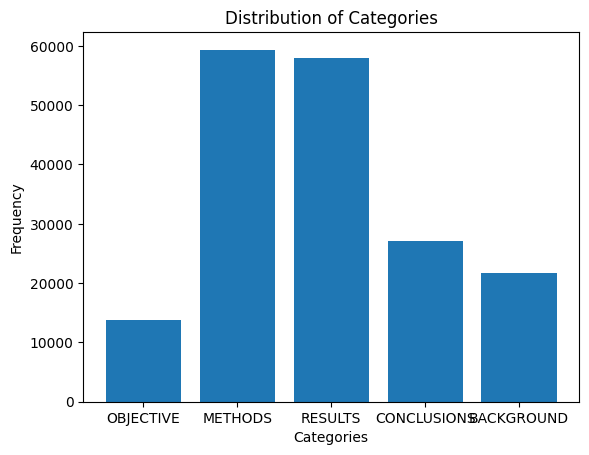

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

counts = Counter(y_train)
categories, frequency = zip(*counts.items())
plt.bar(categories,frequency)
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title("Distribution of Categories")


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(y_train.to_numpy())
val_labels = label_encoder.transform(val_y_train.to_numpy())
test_labels = label_encoder.transform(y_test.to_numpy())

In [14]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

In [15]:
train_labels_one_hot.shape

(180040, 5)

In [16]:
class_names = label_encoder.classes_
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [17]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calculate_result(y_test,pred):
  accuracy = accuracy_score(y_test,pred)*100
  precision,recall,f1score,_=precision_recall_fscore_support(y_test,pred,average="weighted")
  model_result={
      "accuracy":accuracy,
      "precision_score":precision*100,
      "recall_score":recall*100,
      "f1_score":f1score*100
  }
  return model_result

149.3662574983337


(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

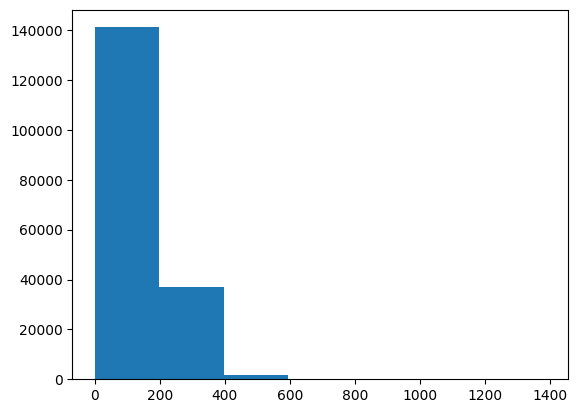

In [18]:
import numpy as np
# Average length of the character
character_length = [len(sentence) for sentence in x_train]
avg_length = np.mean(character_length)
print(avg_length)
plt.hist(character_length,bins=7)

In [19]:
output_char_length = int(np.percentile(character_length,95))
output_char_length

290

In [20]:
def split_char(text):
  return " ".join(list(text))

In [21]:
train_chars = [split_char(char) for char in x_train]
val_chars = [split_char(char) for char in val_x_train]
test_chars = [split_char(char) for char in x_test]

In [22]:
train_chars[0]

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [23]:
import numpy as np

train_chars = np.array(train_chars)
x_train = np.array(x_train)
val_chars = np.array(val_chars)
val_x_train = np.array(val_x_train)


In [24]:
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices(
    ({"char_inputs": train_chars, "token_inputs": x_train}, train_labels_one_hot)
)
val_dataset = tf.data.Dataset.from_tensor_slices(
    ({"char_inputs": val_chars, "token_inputs": val_x_train}, val_labels_one_hot)
)

# Shuffle and batch the training dataset
train_dataset = train_dataset.shuffle(buffer_size=len(train_chars)).batch(32).prefetch(tf.data.AUTOTUNE)

# Batch the validation dataset (no need to shuffle)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [25]:
# Get all keyboard characters for char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
from tensorflow.keras.layers import TextVectorization

NUM_CHAR_TOKENS = len(alphabet) + 2 
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_char_length,
                                    name="vectorizer_layer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [27]:
char_vocab = char_vectorizer.get_vocabulary()

In [28]:
import tensorflow as tf
char_embed = tf.keras.layers.Embedding(input_dim=NUM_CHAR_TOKENS,
                              output_dim=25, 
                              mask_zero=False, 
                              name="char_embedding_layerz")


In [29]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# TextVectorization layer
token_vectorizer = TextVectorization(max_tokens=65000, output_sequence_length=55, name="token_vectorization_layer")

# Adapt the TextVectorization layer to the training data
token_vectorizer.adapt(x_train)

# Extract vocabulary from the token_vectorizer
rct_20k_text_vocab = token_vectorizer.get_vocabulary()

# Token embedding layer
token_embed = tf.keras.layers.Embedding(input_dim=len(rct_20k_text_vocab), output_dim=128, name="token_embedding_layer")


In [30]:
import tensorflow as tf

# Input layers
char_inputs = tf.keras.layers.Input(shape=(1,), dtype="string", name="char_inputs")
token_inputs = tf.keras.layers.Input(shape=(1,), dtype="string", name="token_inputs")

# Character-level processing
char_vectorize_layer = char_vectorizer(char_inputs)
char_embedding_layer = char_embed(char_vectorize_layer)
bidirection_layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(char_embedding_layer)
char_outputs = tf.keras.layers.Dense(128, activation="relu")(bidirection_layer)

# Add Dropout after char-level LSTM
char_outputs = tf.keras.layers.Dropout(0.3)(char_outputs)

# Expand char_outputs to match the sequence length of token_embedding_layer
sequence_length = 55  # Assume this is the sequence length of the token-level processing

# Create a tensor with the same sequence length as token_embedding_layer
char_outputs_expanded = tf.keras.layers.RepeatVector(sequence_length)(char_outputs)

# Token-level processing
token_vectorize_layer = token_vectorizer(token_inputs)
token_embedding_layer = token_embed(token_vectorize_layer)

# Concatenate the embeddings
combined_layer = tf.keras.layers.Concatenate(axis=-1)([char_outputs_expanded, token_embedding_layer])

# Additional processing after concatenation
bidirection_layer1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(combined_layer)

# Add Dropout after concatenation LSTM
bidirection_layer1 = tf.keras.layers.Dropout(0.3)(bidirection_layer1)

# Output layer with Dropout
dense_layer = tf.keras.layers.Dense(128, activation="relu")(bidirection_layer1)
dense_layer = tf.keras.layers.Dropout(0.3)(dense_layer)

output_layers = tf.keras.layers.Dense(len(class_names), activation="softmax")(dense_layer)

# Model definition
model = tf.keras.Model(inputs=[char_inputs, token_inputs], outputs=output_layers)


In [31]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to    ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ char_inputs       │ (None, 1)       │         0 │ -               │
│ (InputLayer)      │                 │           │                 │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ vectorizer_layer  │ (None, 290)     │         0 │ char_inputs[0]… │
│ (TextVectorizati… │                 │           │                 │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ char_embedding_l… │ (None, 290, 25) │     1,750 │ vectorizer_lay… │
│ (Embedding)       │                 │           │                 │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ bidirectional     │ (None, 128)     │    46,080 │ char_embedding… │
│ (Bidirectional)   │                 │           │                 │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ dense (Dense)     │ (None, 128)     │    16,512 │ bidirectional[… │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ token_inputs      │ (None, 1)       │         0 │ -               │
│ (InputLayer)      │                 │           │                 │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ dropout (Dropout) │ (None, 128)     │         0 │ dense[0][0]     │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ token_vectorizat… │ (None, 55)      │         0 │ token_inputs[0… │
│ (TextVectorizati… │                 │           │                 │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ repeat_vector     │ (None, 55, 128) │         0 │ dropout[0][0]   │
│ (RepeatVector)    │                 │           │                 │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ token_embedding_… │ (None, 55, 128) │ 8,299,648 │ token_vectoriz… │
│ (Embedding)       │                 │           │                 │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ concatenate       │ (None, 55, 256) │         0 │ repeat_vector[… │
│ (Concatenate)     │                 │           │ token_embeddin… │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ bidirectional_1   │ (None, 128)     │   164,352 │ concatenate[0]… │
│ (Bidirectional)   │                 │           │                 │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ dropout_1         │ (None, 128)     │         0 │ bidirectional_… │
│ (Dropout)         │                 │           │                 │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ dense_1 (Dense)   │ (None, 128)     │    16,512 │ dropout_1[0][0] │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ dropout_2         │ (None, 128)     │         0 │ dense_1[0][0]   │
│ (Dropout)         │                 │           │                 │
├───────────────────┼─────────────────┼───────────┼─────────────────┤
│ dense_2 (Dense)   │ (None, 5)       │       645 │ dropout_2[0][0] │
└───────────────────┴─────────────────┴───────────┴─────────────────┘

 Total params: 8,545,499 (32.60 MB)

 Trainable params: 8,545,499 (32.60 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [33]:
history = model.fit(train_dataset,epochs=3,validation_data=val_dataset)

Epoch 1/3
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 2244s 396ms/step - accuracy: 0.7366 - loss: 0.6897 - val_accuracy: 0.8251 - val_loss: 0.4672
Epoch 2/3
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 2047s 364ms/step - accuracy: 0.8529 - loss: 0.4102 - val_accuracy: 0.8277 - val_loss: 0.4666
Epoch 3/3
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 2132s 379ms/step - accuracy: 0.8880 - loss: 0.3152 - val_accuracy: 0.8211 - val_loss: 0.4994


In [37]:
model.evaluate(val_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8226 - loss: 0.4912


[0.499352365732193, 0.8211306929588318]

In [39]:
prediction_dataset = tf.data.Dataset.from_tensor_slices(
    {"char_inputs": test_chars, "token_inputs": x_test}
)

# Batch and prefetch as done during training
prediction_dataset = prediction_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
pred = model.predict(prediction_dataset)
pred

942/942 ━━━━━━━━━━━━━━━━━━━━ 49s 51ms/step


array([[3.7550986e-01, 4.0832805e-03, 1.7416310e-02, 6.0059392e-01,
        2.3965756e-03],
       [7.0552863e-03, 3.8904885e-03, 8.3491600e-01, 1.7232835e-02,
        1.3690546e-01],
       [3.5880232e-04, 1.5000078e-04, 9.3031693e-01, 1.0292960e-03,
        6.8144910e-02],
       ...,
       [7.2410490e-05, 1.5326949e-02, 1.9100115e-03, 1.7830076e-05,
        9.8267281e-01],
       [5.3118579e-03, 6.6231996e-02, 3.0175647e-02, 9.7603985e-04,
        8.9730448e-01],
       [5.5380253e-04, 2.9181904e-01, 2.7990253e-03, 2.2617124e-04,
        7.0460194e-01]], dtype=float32)

In [45]:
y_pred = tf.argmax(pred,axis=1)
y_pred[:]

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([3, 2, 2, ..., 4, 4, 4], dtype=int64)>

In [49]:
test_labels.shape

(30135,)

In [50]:
model_results = calculate_result(test_labels,y_pred)

In [51]:
model_results

{'accuracy': 81.53973784635805,
 'precision_score': 81.39754248519799,
 'recall_score': 81.53973784635805,
 'f1_score': 81.44308363671693}

In [54]:
from sklearn.metrics import confusion_matrix
import pandas as pd
conf_matrix = confusion_matrix(test_labels,y_pred)
df = pd.DataFrame(conf_matrix,columns=['OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS', 'BACKGROUND'],index=['OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS', 'BACKGROUND'])
df

,OBJECTIVE,METHODS,RESULTS,CONCLUSIONS,BACKGROUND
OBJECTIVE,2252,418,198,718,35
METHODS,454,3293,128,86,610
RESULTS,131,66,9041,121,538
CONCLUSIONS,605,121,118,1473,16
BACKGROUND,43,379,761,17,8513


In [38]:
model.save("Skimlit_project_model.h5")

In [55]:
import pickle

# Save vocab for the character vectorizer
char_vocab = char_vectorizer.get_vocabulary()
with open('char_vocab.pkl', 'wb') as f:
    pickle.dump(char_vocab, f)

# Save vocab for the token vectorizer
token_vocab = token_vectorizer.get_vocabulary()
with open('token_vocab.pkl', 'wb') as f:
    pickle.dump(token_vocab, f)